In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"r0x101","key":"70b2de343f4ac35f6c5a4b4e0c014281"}'}

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download mrwellsdavid/unsw-nb15

 97% 144M/149M [00:01<00:00, 113MB/s]
100% 149M/149M [00:01<00:00, 133MB/s]


In [ ]:
!unzip unsw-nb15.zip

Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  


In [ ]:
import pandas as pd
import numpy as np
from numpy import mean,std
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv("UNSW_NB15_testing-set.csv")
df1.dataframeName = 'wiresharkdata.csv'
nRow,nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 175341 rows and 45 columns


In [ ]:
df1.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df1.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
df2 = pd.read_csv("UNSW_NB15_training-set.csv")
df2.dataframeName = 'wiresharkdatatest.csv'
nRow,nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 82332 rows and 45 columns


In [ ]:
df2.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df1=df1.drop(['id'],axis=1)

In [ ]:
df2=df2.drop(['id'],axis=1)

In [ ]:
for x in df1.columns:
  print(df1[x].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
df1

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


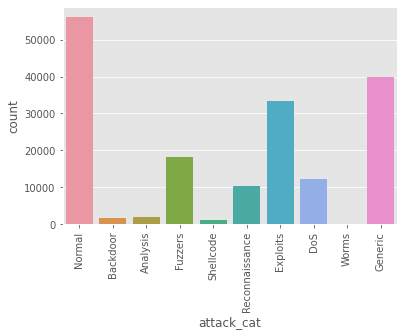

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df1['attack_cat'])

In [ ]:
df1.drop(df1[(df1['attack_cat'] != 'DoS') & (df1['attack_cat'] != 'Normal')].index, inplace = True)
df2.drop(df2[(df2['attack_cat'] != 'DoS') & (df2['attack_cat'] != 'Normal')].index, inplace = True)

In [ ]:
df1

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174378,4.598935,ospf,-,INT,82,0,5248,0,17.612773,254,0,9.017739e+03,0.000000,0,0,56.776977,0.000000,161.878984,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,13,1,1,1,0,0,0,1,1,0,DoS,1
174898,0.959789,tcp,ftp,FIN,12,12,740,728,23.963601,254,252,5.659577e+03,5567.890625,3,3,82.878908,81.412633,5060.786616,110.997609,255,3718703795,3333298646,255,0.096049,0.064241,0.031808,62,61,0,0,1,1,1,1,1,1,0,0,0,1,1,0,DoS,1
175055,0.208146,tcp,dns,FIN,10,12,508,7924,100.890718,62,252,1.760303e+04,279188.625000,2,4,23.127333,17.378091,1167.367018,1216.896533,255,2162454949,913052151,255,0.032816,0.016326,0.016490,51,660,0,0,1,1,1,1,1,1,0,0,0,1,1,0,DoS,1
175092,0.000019,udp,-,INT,2,0,106,0,52631.581290,254,0,2.231579e+07,0.000000,0,0,0.019000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,53,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,DoS,1


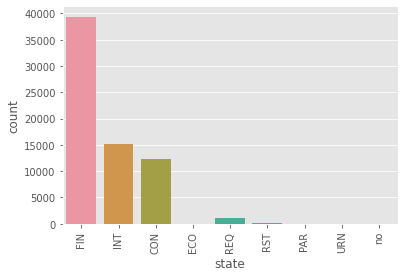

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df1['state'])

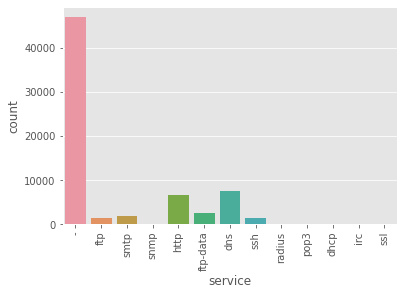

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df1['service'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d

class MyLabelEncoder(LabelEncoder):

    def fit(self, y, arr=[]):
        y = column_or_1d(y, warn=True)
        if arr == []:
            arr=y
        self.classes_ = pd.Series(arr).unique()
        return self

le = MyLabelEncoder()

In [ ]:
df1.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68264 entries, 0 to 175248
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   proto       68264 non-null  object
 1   service     68264 non-null  object
 2   state       68264 non-null  object
 3   attack_cat  68264 non-null  object
dtypes: object(4)
memory usage: 5.1+ MB


In [ ]:
for feature in df1.select_dtypes("object").columns:
    df1[feature]=le.fit_transform(df1[feature])

In [ ]:
df1

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,1,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,1,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,1,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174378,4.598935,78,0,3,82,0,5248,0,17.612773,254,0,9.017739e+03,0.000000,0,0,56.776977,0.000000,161.878984,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,13,1,1,1,0,0,0,1,1,0,0,1
174898,0.959789,113,3,2,12,12,740,728,23.963601,254,252,5.659577e+03,5567.890625,3,3,82.878908,81.412633,5060.786616,110.997609,255,3718703795,3333298646,255,0.096049,0.064241,0.031808,62,61,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1
175055,0.208146,113,2,2,10,12,508,7924,100.890718,62,252,1.760303e+04,279188.625000,2,4,23.127333,17.378091,1167.367018,1216.896533,255,2162454949,913052151,255,0.032816,0.016326,0.016490,51,660,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1
175092,0.000019,119,0,3,2,0,106,0,52631.581290,254,0,2.231579e+07,0.000000,0,0,0.019000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,53,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,0,1


In [ ]:
for feature in df2.select_dtypes("object").columns:
    df2[feature]=le.fit_transform(df2[feature])

In [ ]:
df2

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,3,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,1,0
1,0.000008,117,0,3,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,1,0
2,0.000005,117,0,3,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,1,0
3,0.000006,117,0,3,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,1,0
4,0.000010,117,0,3,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,0,3,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,1,0
82328,1.106101,111,0,2,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,1,0
82329,0.000000,6,0,3,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,1,0
82330,0.000000,6,0,3,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,1,0


<BarContainer object of 43 artists>

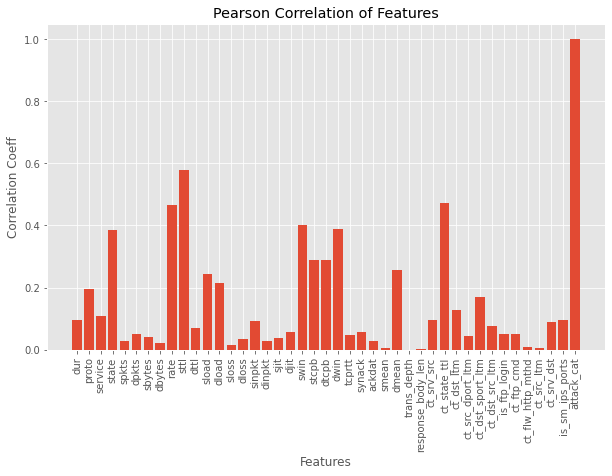

In [ ]:
pcorr=df1.drop('label',1).corrwith(df1['label'])
plt.figure(figsize=(10,6))
plt.title("Pearson Correlation of Features")
plt.xlabel("Features")
plt.ylabel("Correlation Coeff")
plt.xticks(rotation=90)
plt.bar(pcorr.index, list(map(abs,pcorr.values)))

In [ ]:
df1=df1.drop(['dur','proto','service','spkts','sbytes','dinpkt','response_body_len','sloss','sjit','smean','trans_depth','is_ftp_login','ct_ftp_cmd','ct_flw_http_mthd'],axis=1)

In [ ]:
df2=df2.drop(['dur','proto','service','spkts','sbytes','dinpkt','response_body_len','sloss','sjit','smean','trans_depth','is_ftp_login','ct_ftp_cmd','ct_flw_http_mthd'],axis=1)

<BarContainer object of 29 artists>

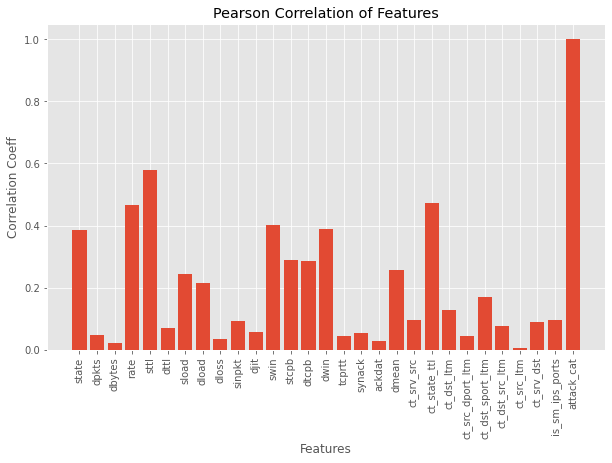

In [ ]:
pcorr=df1.drop('label',1).corrwith(df1['label'])
plt.figure(figsize=(10,6))
plt.title("Pearson Correlation of Features")
plt.xlabel("Features")
plt.ylabel("Correlation Coeff")
plt.xticks(rotation=90)
plt.bar(pcorr.index, list(map(abs,pcorr.values)))

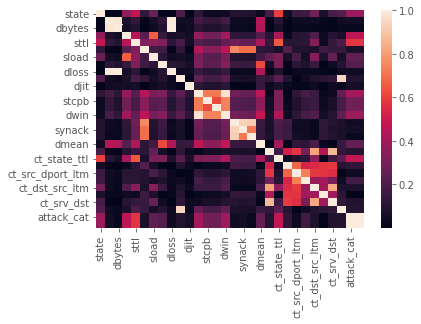

In [ ]:
sns.heatmap(df1.corr().apply(abs))

In [ ]:
df1 = df1.drop(['dpkts', 'dloss', 'is_sm_ips_ports', 'tcprtt', 'ackdat', 'ct_srv_src', 'ct_dst_src_ltm', 'swin'], axis=1)

In [ ]:
df2 = df2.drop(['dpkts', 'dloss', 'is_sm_ips_ports', 'tcprtt', 'ackdat', 'ct_srv_src', 'ct_dst_src_ltm', 'swin'], axis=1)

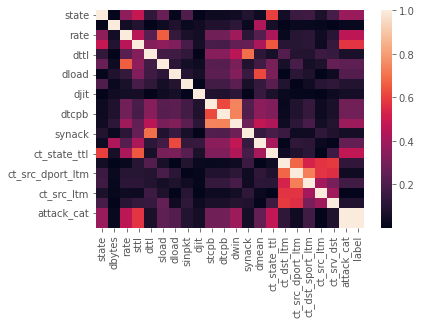

In [ ]:
sns.heatmap(df1.corr().apply(abs))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68264 entries, 0 to 175248
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             68264 non-null  int64  
 1   dbytes            68264 non-null  int64  
 2   rate              68264 non-null  float64
 3   sttl              68264 non-null  int64  
 4   dttl              68264 non-null  int64  
 5   sload             68264 non-null  float64
 6   dload             68264 non-null  float64
 7   sinpkt            68264 non-null  float64
 8   djit              68264 non-null  float64
 9   stcpb             68264 non-null  int64  
 10  dtcpb             68264 non-null  int64  
 11  dwin              68264 non-null  int64  
 12  synack            68264 non-null  float64
 13  dmean             68264 non-null  int64  
 14  ct_state_ttl      68264 non-null  int64  
 15  ct_dst_ltm        68264 non-null  int64  
 16  ct_src_dport_ltm  68264 non-null  int64

In [ ]:
y_train=df1['label']
X_train=df1.drop('label',1)

In [ ]:
y_test=df2['label']
X_test=df2.drop('label',1)

In [ ]:
seed= 42

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
models = {
    'LR':LogisticRegression(random_state=seed),
    'RF':RandomForestClassifier(random_state=seed,criterion='entropy'),
    'DT':DecisionTreeClassifier(random_state=seed, criterion='entropy'), 
    'KNN':KNeighborsClassifier(),
    'ET':ExtraTreesClassifier(random_state=seed,criterion="entropy"),
    'XGB':XGBClassifier(random_state=seed),
    'ADA':AdaBoostClassifier(random_state=seed),
    'GB':GradientBoostingClassifier(random_state=seed)
    }

In [ ]:
def plot_scores(xval,yval,show_value=False):
    plt.ylim(ymax = max(yval)+0.5, ymin = min(yval)-0.5)
    plt.xticks(rotation=45)
    s = sns.barplot(xval,yval)
    if show_value:
        for x,y in zip(range(len(yval)),yval):
            s.text(x,y+0.1,round(y,2),ha="center")

In [ ]:
models =[(key,value) for key,value in models.items()]

In [ ]:
print(models)

[('LR', LogisticRegression(random_state=42)), ('RF', RandomForestClassifier(criterion='entropy', random_state=42)), ('DT', DecisionTreeClassifier(criterion='entropy', random_state=42)), ('KNN', KNeighborsClassifier()), ('ET', ExtraTreesClassifier(criterion='entropy', random_state=42)), ('XGB', XGBClassifier(random_state=42)), ('ADA', AdaBoostClassifier(random_state=42)), ('GB', GradientBoostingClassifier(random_state=42))]


In [ ]:
import time
scores=[]
preds=[]
t=[]
for model in models:
    model[1].fit(X_train,y_train)
    print(model[0],"trained.")
    scores.append(model[1].score(X_test,y_test))
    start_time = time.time()
    preds.append(model[1].predict(X_test))
    t.append((time.time()-start_time)/(y_test.size))
print("Results are ready.")

LR trained.
RF trained.
DT trained.
KNN trained.
ET trained.
XGB trained.
ADA trained.
GB trained.
Results are ready.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model_names= [i[0] for i in models]
scores = list(map(lambda x: x*100, scores))

In [ ]:
index = 0
#41089
for i in preds:
  print(model_names[index])
  cm = confusion_matrix(y_test, i)
  print(cm)
  p = cm[0][0]/(cm[0][0] + cm[0][1])
  r = cm[0][0]/(cm[0][0] + cm[1][0])
  print("Precision: ", '%.2f'%p)
  print("Recall: ", '%.2f'%r)
  print("F-score:", 2*p*r/(p+r))
  print("Time to predict: ", t[index]*y_test.size)
  print("\n")
  index = index + 1

LR
[[33810  3190]
 [ 1407  2682]]
Precision:  0.91
Recall:  0.96
F-score: 0.9363446279961782
Time to predict:  0.006507158279418945


RF
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.2359306812286377


DT
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.009255409240722656


KNN
[[36258   742]
 [ 1315  2774]]
Precision:  0.98
Recall:  0.97
F-score: 0.9724162900781784
Time to predict:  49.6117970943451


ET
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.23770928382873535


XGB
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.04407310485839844


ADA
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.013460397720336914


GB
[[37000     0]
 [    0  4089]]
Precision:  1.00
Recall:  1.00
F-score: 1.0
Time to predict:  0.030294418334960938




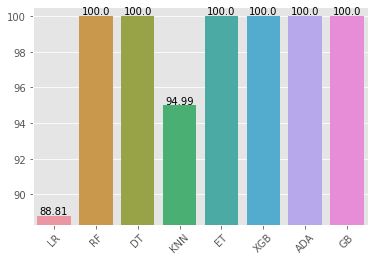

In [ ]:
plot_scores(model_names, scores, True)